# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> | Predicting Sleep Disorders |</p>

<h1 style="text-align:center; font-size: 2.5em; font-weight: bold; background: linear-gradient(90deg, #ff7eb3, #ff758c); -webkit-background-clip: text; color: transparent;">📌 Table of Contents</h1>
<ul style="font-size: 1.2em; list-style-type: none;">
    <li> <a href="#intro">Introduction</a></li>
    <li><a href="#problem">Objective</a></li>
    <li>1. <a href="#data_collection">Data Collection</a></li>
    <li>2. <a href="#eda">Exploratory Data Analysis (EDA)</a></li>
    <li>3. <a href="#preprocessing">Data Preprocessing</a></li>
    <li>4. <a href="#feature">Feature Engineering</a></li>
    <li>5. <a href="#model">Model Building</a></li>
    <li>6. <a href="#evaluation">Model Evaluation</a></li>
</ul>
<!-- CSS for Animations & Styling -->
<style>
@keyframes fadeIn {
  from { opacity: 0; }
  to { opacity: 1; }
}

h1, h2 {
  animation: fadeIn 1.5s ease-in-out;
}

ul li a {
  transition: color 0.3s;
}

ul li a:hover {
  color: #e74c3c;
}
</style>

<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Problem:</h3>
  <p style="color: #ecf0f1;"> <!-- Using a soothing purple shade -->
    This project focuses on predicting sleep disorders using machine learning by analyzing various patient attributes such as age, gender, lifestyle factors (stress levels, physical activity, screen time), medical history, BMI, and sleep patterns. By leveraging advanced predictive models, the goal is to assist healthcare professionals in early detection, personalized treatment, and lifestyle recommendations. Identifying key risk factors will enable timely interventions, improve diagnosis accuracy, and enhance sleep health strategies. With a strong emphasis on model accuracy and interpretability, this study aims to provide valuable insights that contribute to better healthcare outcomes and improved quality of life for individuals experiencing sleep-related issues.
  </p>
</div>

<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Objective:</h3>
  <p style="color: #ecf0f1;">
    <ul>
      <li><strong>Understand Key Factors:</strong> Analyze the dataset to uncover patterns, distributions, and relationships between patient attributes (e.g., age, gender, lifestyle habits, BMI, stress levels, and sleep duration) and their impact on sleep disorders.</li>
      <li><strong>Conduct Extensive Exploratory Data Analysis (EDA):</strong> Perform detailed analysis to identify trends, correlations, and potential risk factors contributing to sleep disorders such as Insomnia and Sleep Apnea.</li>
      <li><strong>Preprocessing Steps:</strong>
        <ul>
          <li>Remove irrelevant or redundant features</li>
          <li>Handle missing values using appropriate imputation techniques</li>
          <li>Address outliers that may affect model performance</li>
          <li>Encode categorical variables for machine learning compatibility</li>
          <li>Normalize numerical features to improve model accuracy</li>
        </ul>
      </li>
      <li><strong>Develop a Predictive Model:</strong> Build and fine-tune machine learning models such as Logistic Regression, Random Forest, Decision Trees, Support Vector Machines, and Gradient Boosting to classify sleep disorders.</li>
      <li><strong>Evaluate Model Performance:</strong> Use metrics like accuracy, precision, recall, F1-score, and confusion matrix to assess model effectiveness and ensure reliable predictions for early detection of sleep disorders.</li>
    </ul>
  </p>
</div>

<a id="import"></a>
<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
   Import Libraries
</p>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
import shap
!pip install lime
import lime
import lime.lime_tabular
from sklearn.feature_selection import SelectKBest, f_classif,chi2, RFE
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=92b0b320c6e8bff7a236fd079965aa453ce69fcad0f8c50568d9356f931e3db2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


<!-- Data Collection -->
<h2 id="data_collection" style="color: #4CAF50; text-decoration: underline;"> Data Collection</h2>


In [3]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,155,2,Sleep Apnea,78


In [8]:
# Check unique values in 'sleep_disorder'
print(data['Sleep Disorder'].unique())

# Check value counts
print(data['Sleep Disorder'].value_counts(dropna=False))

[nan 'Sleep Apnea' 'Insomnia']
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [9]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna("No Disorder")

In [10]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
# Convert 'blood_pressure' column into separate systolic and diastolic values
data[['systolic_bp', 'diastolic_bp']] = data['blood_pressure'].str.split('/', expand=True).astype(float)

# Drop original 'blood_pressure' column
data.drop(columns=['blood_pressure'], inplace=True)

# Check for any other object-type columns that should be numeric
print(data.dtypes)


person_id                    int64
gender                      object
age                          int64
occupation                  object
sleep_duration             float64
quality_of_sleep             int64
physical_activity_level      int64
stress_level                 int64
bmi_category                object
heart_rate                   int64
daily_steps                  int64
sleep_disorder              object
systolic_bp                float64
diastolic_bp               float64
dtype: object


In [12]:
data[['systolic_bp', 'diastolic_bp']] = data[['systolic_bp', 'diastolic_bp']].apply(pd.to_numeric)

<!-- EDA -->
<h2 id="eda" style="color: #1E90FF; text-decoration: underline;">Exploratory Data Analysis (EDA)</h2>


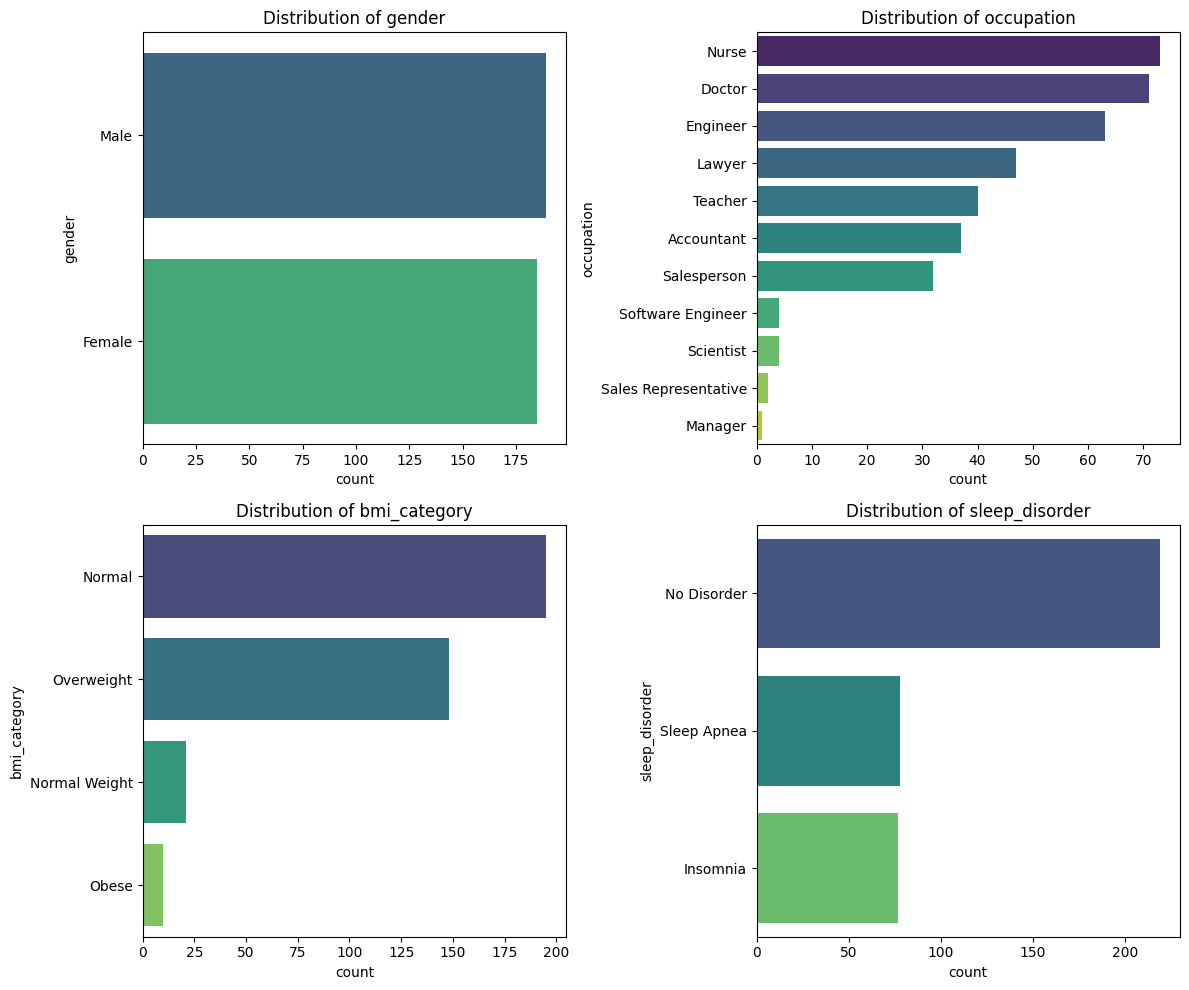

In [13]:
# Automatically detect categorical columns (object or categorical type)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Set figure size dynamically based on the number of categories
rows = (len(categorical_cols) + 1) // 2  # Arrange in 2 columns
plt.figure(figsize=(12, 5 * rows))  # Adjust height dynamically

# Generate count plots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 2, i)
    sns.countplot(y=data[col], palette="viridis", order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

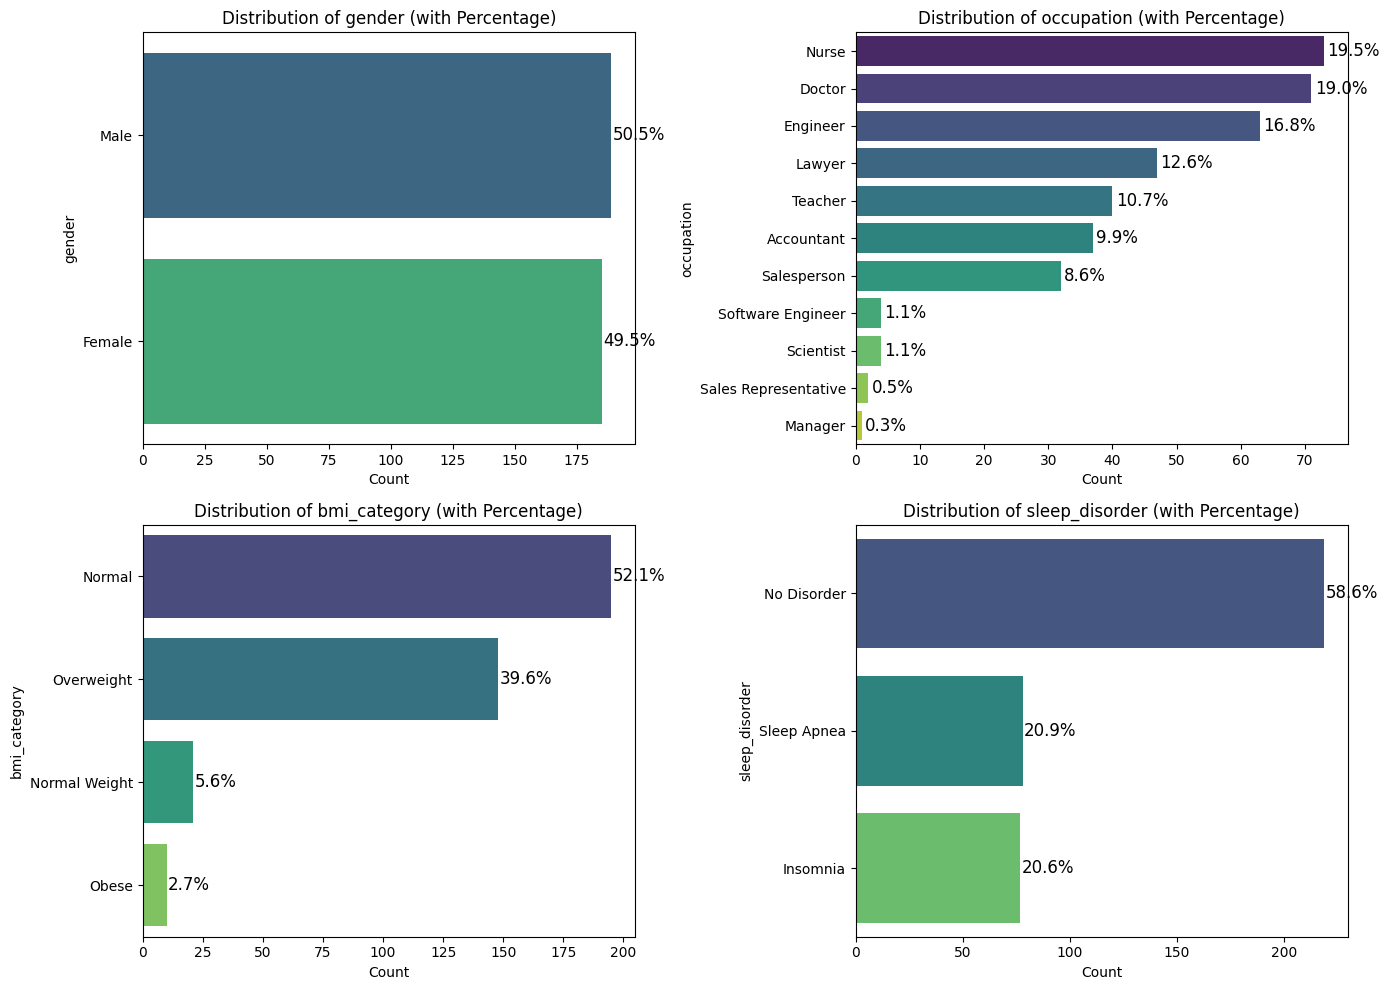

In [14]:
# Function to plot count plots with percentage labels
def plot_categorical_distribution(data):
    # Selecting only categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

    # Setting figure size dynamically based on the number of categorical columns
    num_cols = len(categorical_cols)
    rows = (num_cols + 1) // 2  # Create rows dynamically for subplots

    plt.figure(figsize=(14, 5 * rows))  # Adjust the figure size dynamically

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, 2, i)  # Creating subplots

        # Create count plot
        ax = sns.countplot(y=data[col], palette="viridis", order=data[col].value_counts().index)

        # Calculate total count
        total = len(data[col])

        # Annotate each bar with percentage values
        for p in ax.patches:
            width = p.get_width()
            percentage = f"{100 * width / total:.1f}%"
            ax.annotate(percentage, (width + 0.5, p.get_y() + p.get_height()/2),
                        va='center', fontsize=12, color='black')

        plt.title(f"Distribution of {col} (with Percentage)")
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call function
plot_categorical_distribution(data)


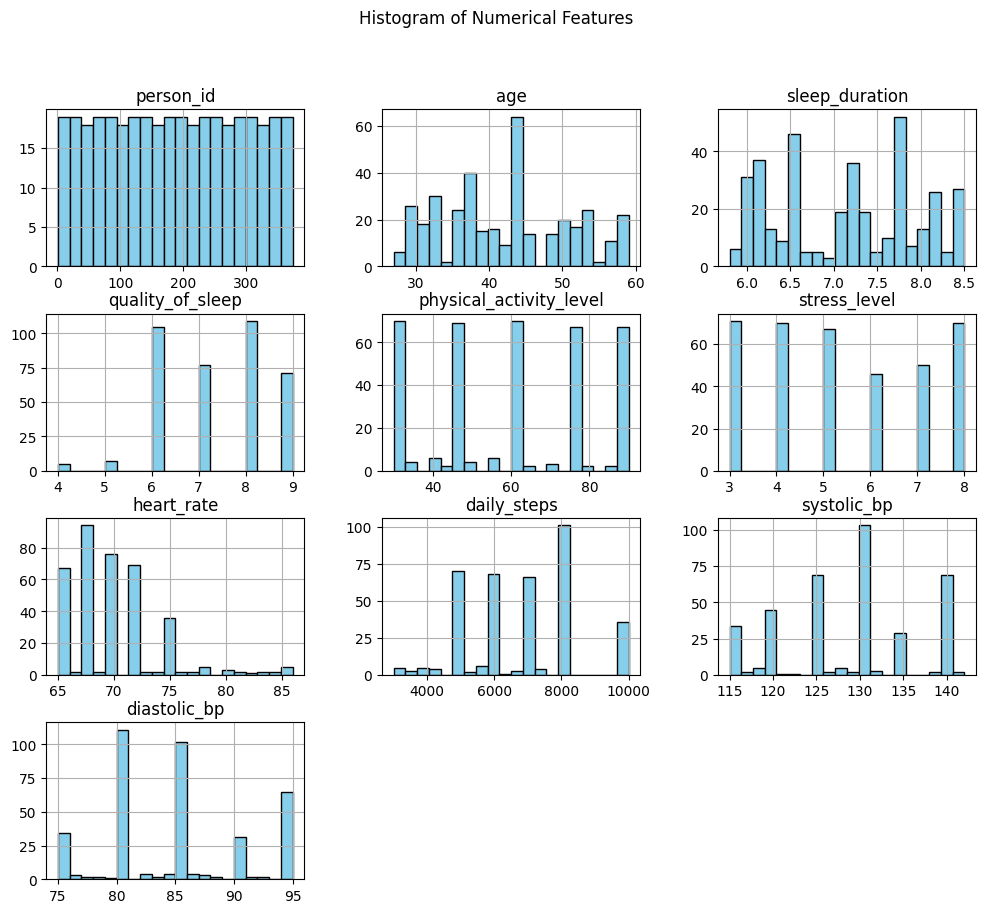

In [15]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.show()

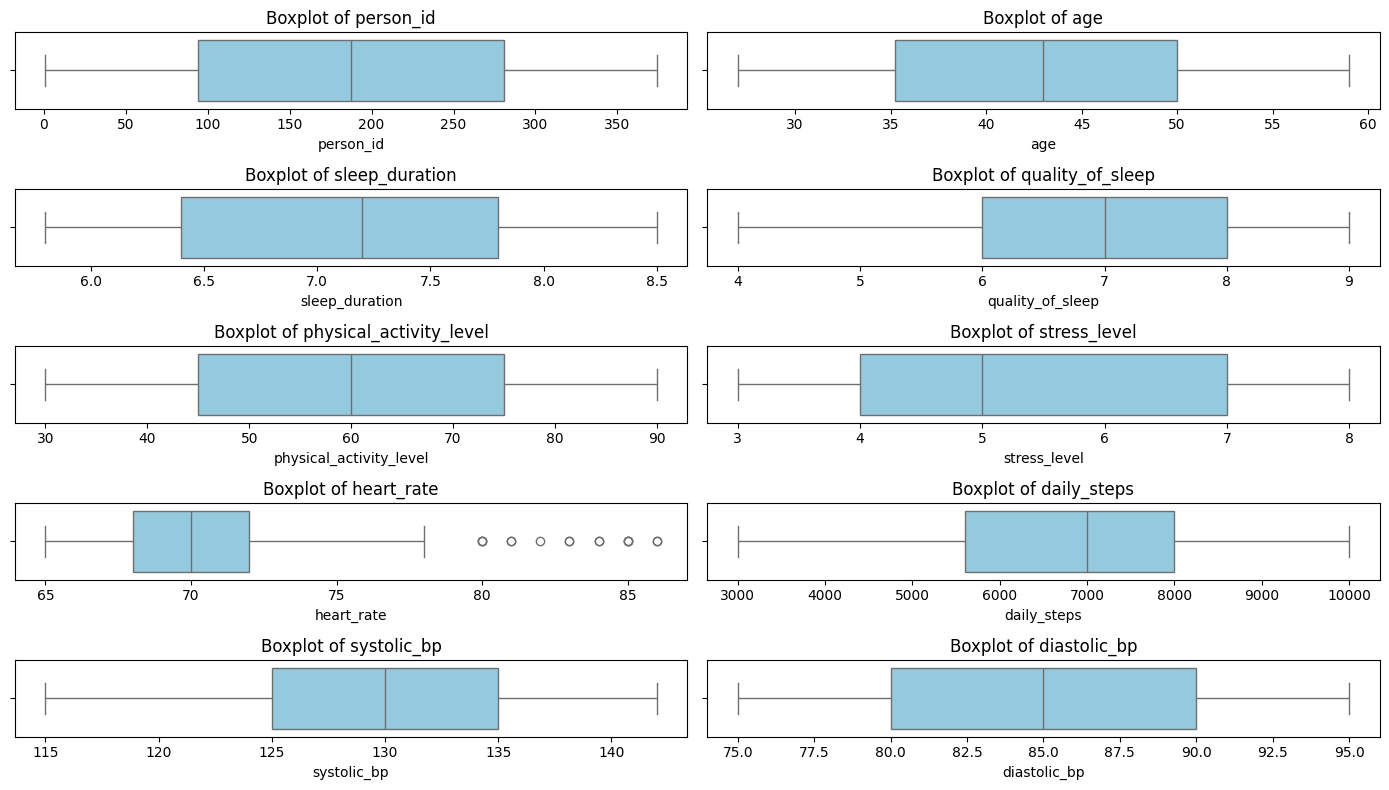

In [16]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

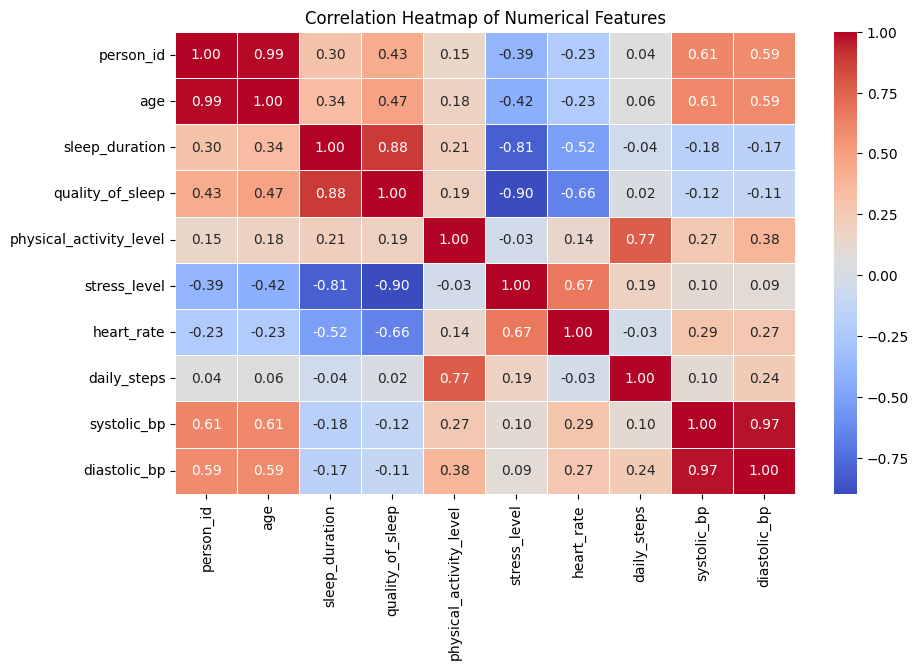

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

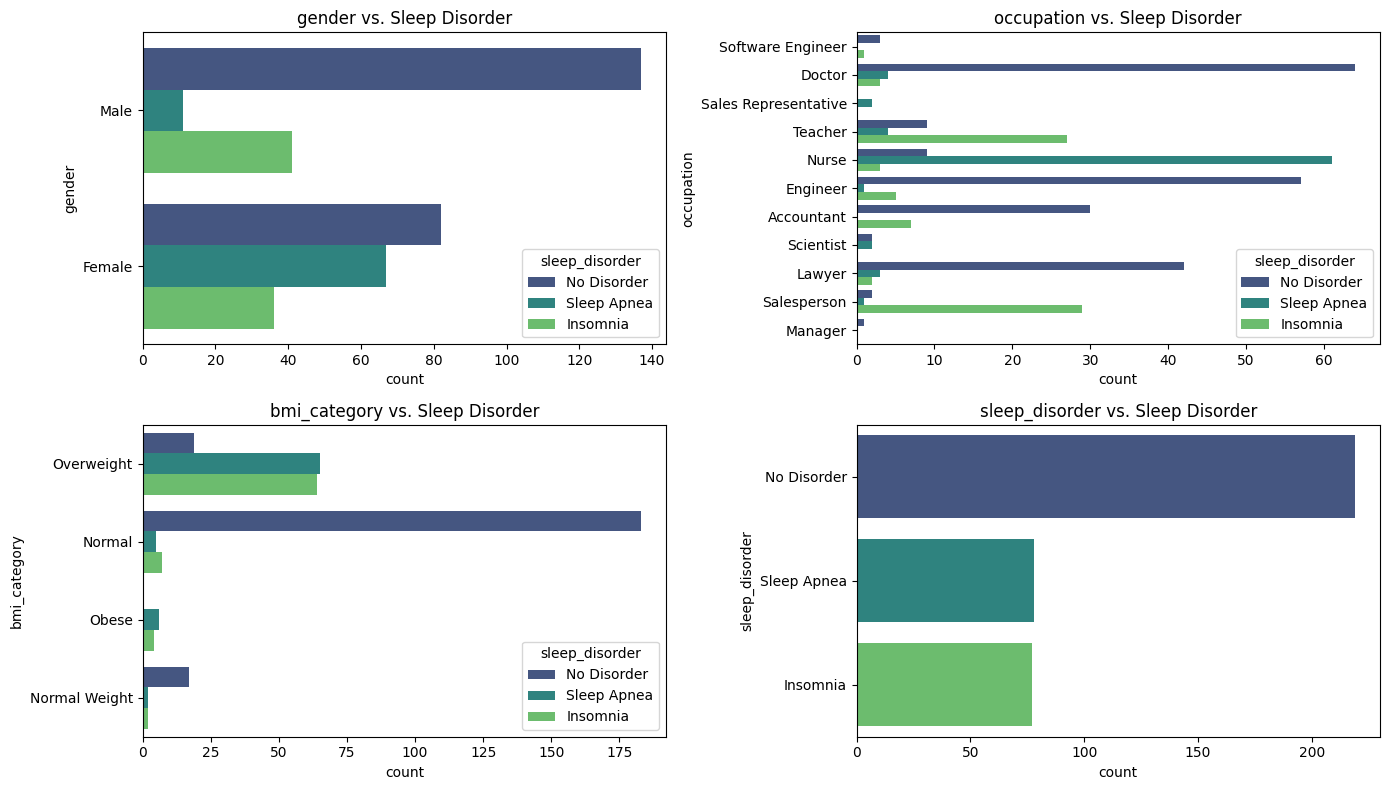

In [18]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i)
    sns.countplot(y=data[col], hue=data['sleep_disorder'], palette="viridis")
    plt.title(f"{col} vs. Sleep Disorder")
plt.tight_layout()
plt.show()

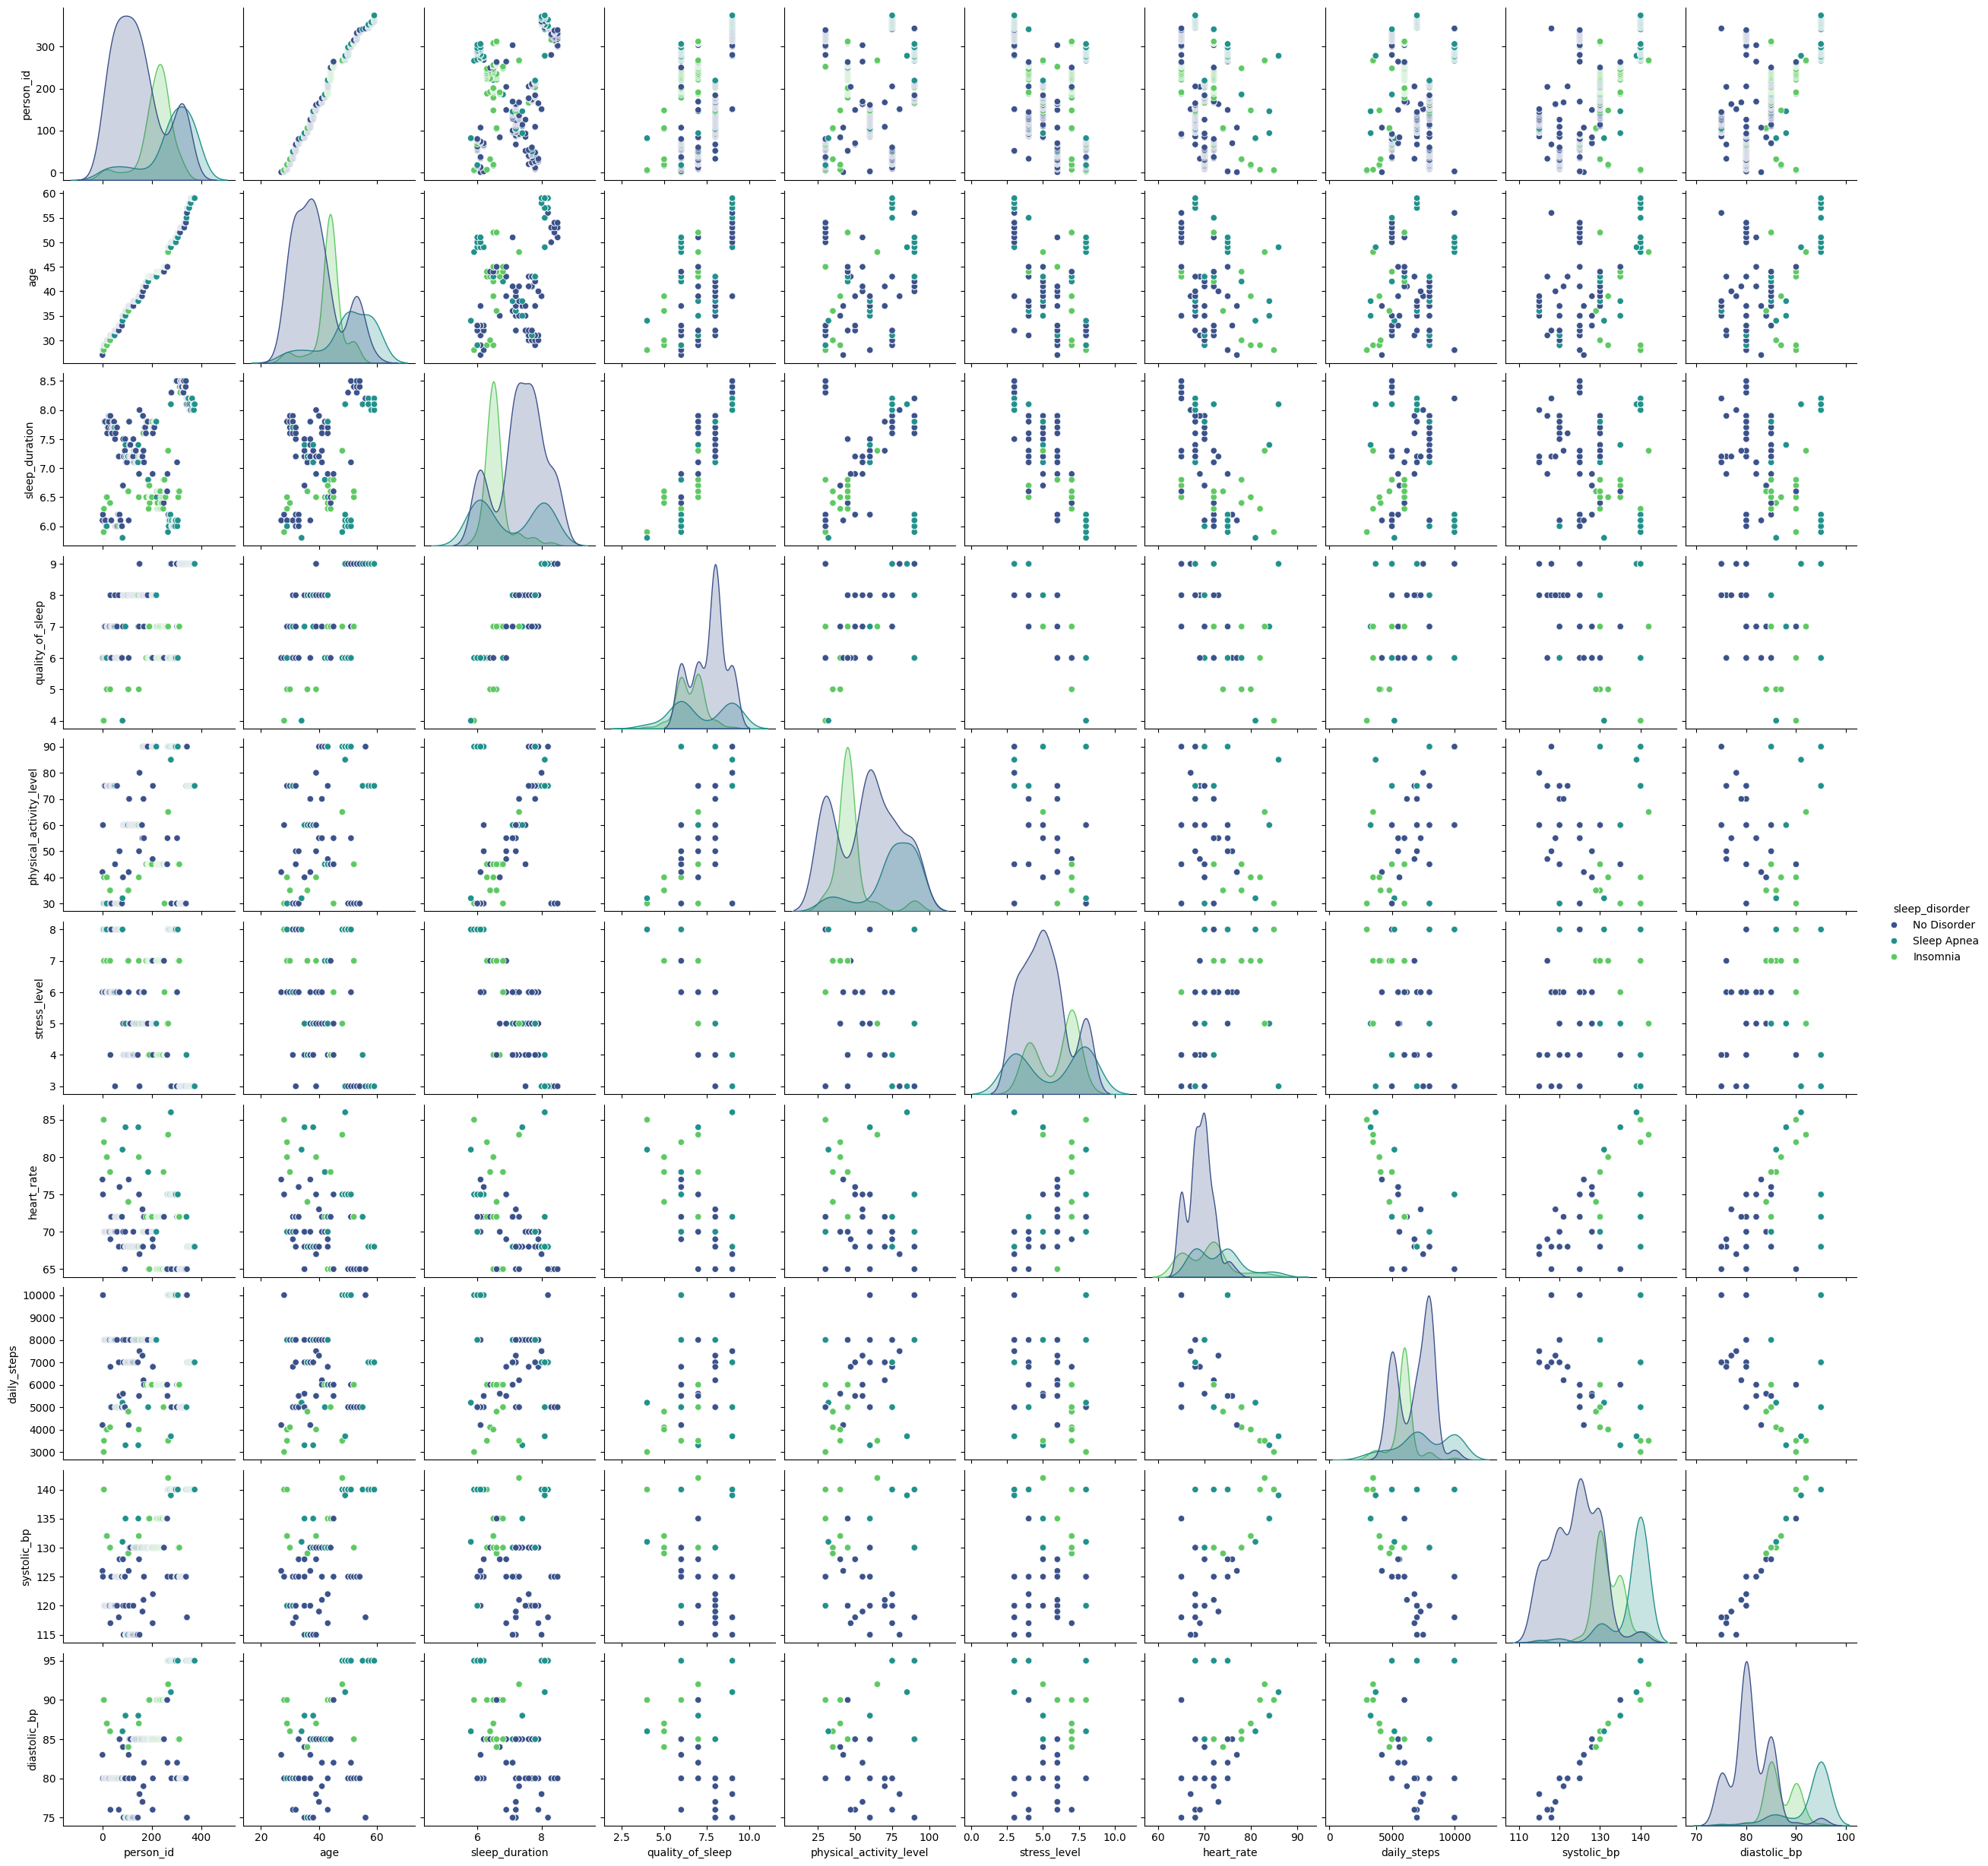

In [19]:
sns.pairplot(data, hue="sleep_disorder", palette="viridis")
plt.show()

<!-- Data Preprocessing -->
<h2 id="preprocessing" style="color: #FF9800; text-decoration: underline;"> Data Preprocessing</h2>


In [20]:
# Drop 'person_id' column as it does not contribute to the prediction
data.drop(columns=['person_id'], inplace=True)

# Display the first few rows after dropping
data.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [21]:
# Select only numeric columns dynamically
num_cols = data.select_dtypes(include=['number']).columns.tolist()

# Print numeric columns
print("Numeric Columns:", num_cols)


Numeric Columns: ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps', 'systolic_bp', 'diastolic_bp']


In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check outliers for each numerical column
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in age: 0
Outliers in sleep_duration: 0
Outliers in quality_of_sleep: 0
Outliers in physical_activity_level: 0
Outliers in stress_level: 0
Outliers in heart_rate: 15
Outliers in daily_steps: 0
Outliers in systolic_bp: 0
Outliers in diastolic_bp: 0


In [23]:
Q1 = data['heart_rate'].quantile(0.25)
Q3 = data['heart_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = data[(data['heart_rate'] >= lower_bound) & (data['heart_rate'] <= upper_bound)]

print("Outliers removed. New shape:", data.shape)


Outliers removed. New shape: (374, 13)


In [24]:
# Compute Z-scores
z_scores = np.abs(zscore(data[num_cols]))

# Check for remaining outliers
outliers = (z_scores > 3).sum(axis=0)
print("Remaining outliers after removal:", outliers)


Remaining outliers after removal: age                        0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
heart_rate                 9
daily_steps                0
systolic_bp                0
diastolic_bp               0
dtype: int64


In [25]:
Q1 = data['heart_rate'].quantile(0.25)
Q3 = data['heart_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['heart_rate'] >= lower_bound) & (data['heart_rate'] <= upper_bound)]
print("New shape after removing remaining heart_rate outliers:", data.shape)


New shape after removing remaining heart_rate outliers: (359, 13)


In [26]:
z_scores = np.abs(zscore(df[num_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Remaining outliers after second removal:", outliers)


Remaining outliers after second removal: age                        0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
heart_rate                 0
daily_steps                0
systolic_bp                0
diastolic_bp               0
dtype: int64


In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to Gender, BMI Category, and Sleep Disorder
for col in ['gender','occupation', 'bmi_category', 'sleep_disorder']:
    data[col] = label_encoder.fit_transform(data[col])

In [28]:
skewness = data.skew()  # Check skewness for each feature
print(skewness)

gender                     0.005594
age                        0.258681
occupation                 0.632608
sleep_duration             0.028790
quality_of_sleep          -0.012828
physical_activity_level    0.049605
stress_level               0.185689
bmi_category               0.282136
heart_rate                 0.324849
daily_steps                0.373112
sleep_disorder             0.003902
systolic_bp                0.009326
diastolic_bp               0.449901
dtype: float64


In [29]:
# List of columns to apply transformation
skewed_features = ['occupation', 'heart_rate', 'daily_steps', 'diastolic_bp']

# Apply Log Transformation (for positive skewness)
for col in skewed_features:
    if col in ['heart_rate', 'daily_steps']:
        df[col] = np.log1p(df[col])  # log1p is used to avoid log(0) error

# Apply Square Root Transformation (for moderate skewness)
df['diastolic_bp'] = np.sqrt(df['diastolic_bp'])


Skewness After Transformation:
 gender                     0.005594
age                        0.258681
occupation                 0.632608
sleep_duration             0.028790
quality_of_sleep          -0.012828
physical_activity_level    0.049605
stress_level               0.185689
bmi_category               0.282136
heart_rate                 0.324849
daily_steps                0.373112
sleep_disorder             0.003902
systolic_bp                0.009326
diastolic_bp               0.449901
dtype: float64


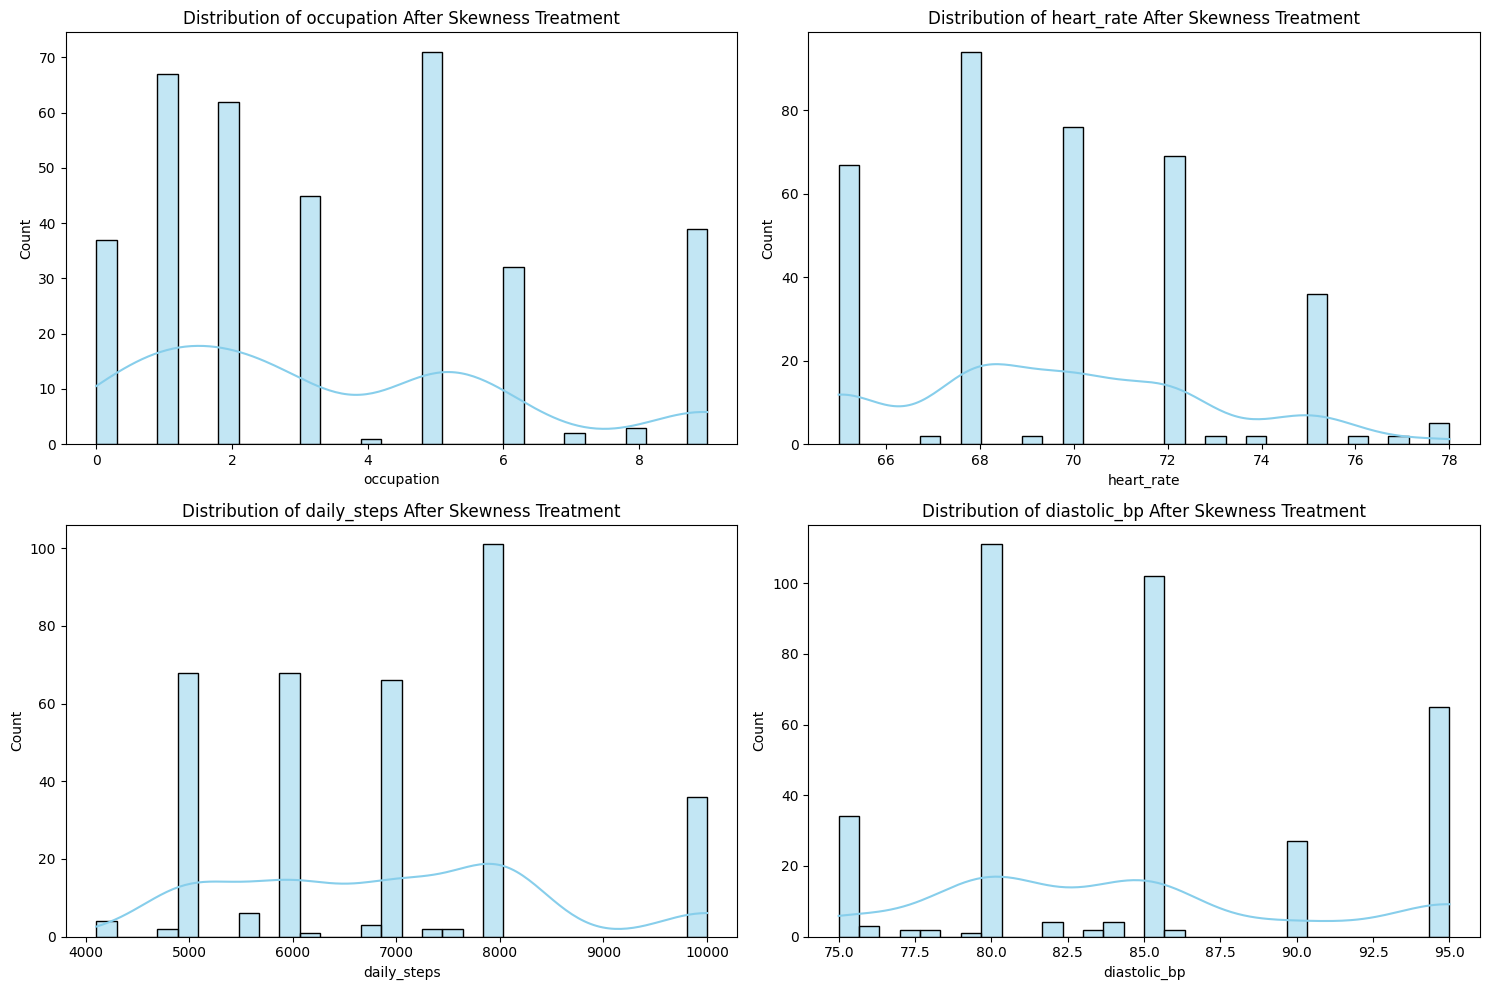

In [30]:
# Check Skewness After Transformation
skewness_after = data.skew()
print("Skewness After Transformation:\n", skewness_after)

# Visualize Skewness using Histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col} After Skewness Treatment")
plt.tight_layout()
plt.show()


In [31]:
# Applying Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
data['occupation'] = pt.fit_transform(data[['occupation']])

# Check Skewness Again
print("Skewness After Final Transformation:\n", data.skew())


Skewness After Final Transformation:
 gender                     0.005594
age                        0.258681
occupation                -0.059336
sleep_duration             0.028790
quality_of_sleep          -0.012828
physical_activity_level    0.049605
stress_level               0.185689
bmi_category               0.282136
heart_rate                 0.324849
daily_steps                0.373112
sleep_disorder             0.003902
systolic_bp                0.009326
diastolic_bp               0.449901
dtype: float64


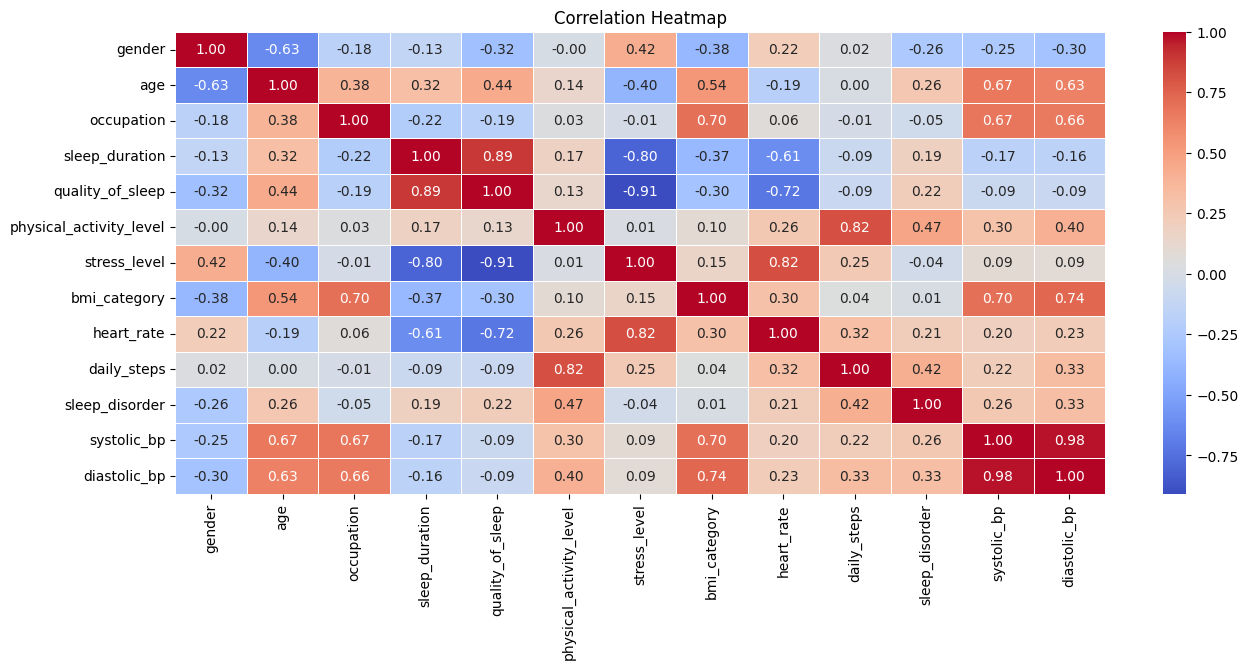

In [32]:
# Compute correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [33]:
# Select only numeric columns
X = data[['age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
        'stress_level', 'bmi_category', 'heart_rate', 'daily_steps', 'systolic_bp', 'diastolic_bp']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by='VIF', ascending=False))


                    Feature           VIF
9               systolic_bp  13184.938959
10             diastolic_bp  10388.879418
7                heart_rate   1220.797126
3          quality_of_sleep    900.639387
2            sleep_duration    474.887912
5              stress_level    193.580468
0                       age    119.389209
8               daily_steps    108.422634
4   physical_activity_level     36.337013
6              bmi_category     13.396042
1                occupation      3.469883


In [34]:
# Drop highly correlated features
data = data.drop(columns=['diastolic_bp', 'quality_of_sleep'])

# Display updated dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   359 non-null    int64  
 1   age                      359 non-null    int64  
 2   occupation               359 non-null    float64
 3   sleep_duration           359 non-null    float64
 4   physical_activity_level  359 non-null    int64  
 5   stress_level             359 non-null    int64  
 6   bmi_category             359 non-null    int64  
 7   heart_rate               359 non-null    int64  
 8   daily_steps              359 non-null    int64  
 9   sleep_disorder           359 non-null    int64  
 10  systolic_bp              359 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 33.7 KB


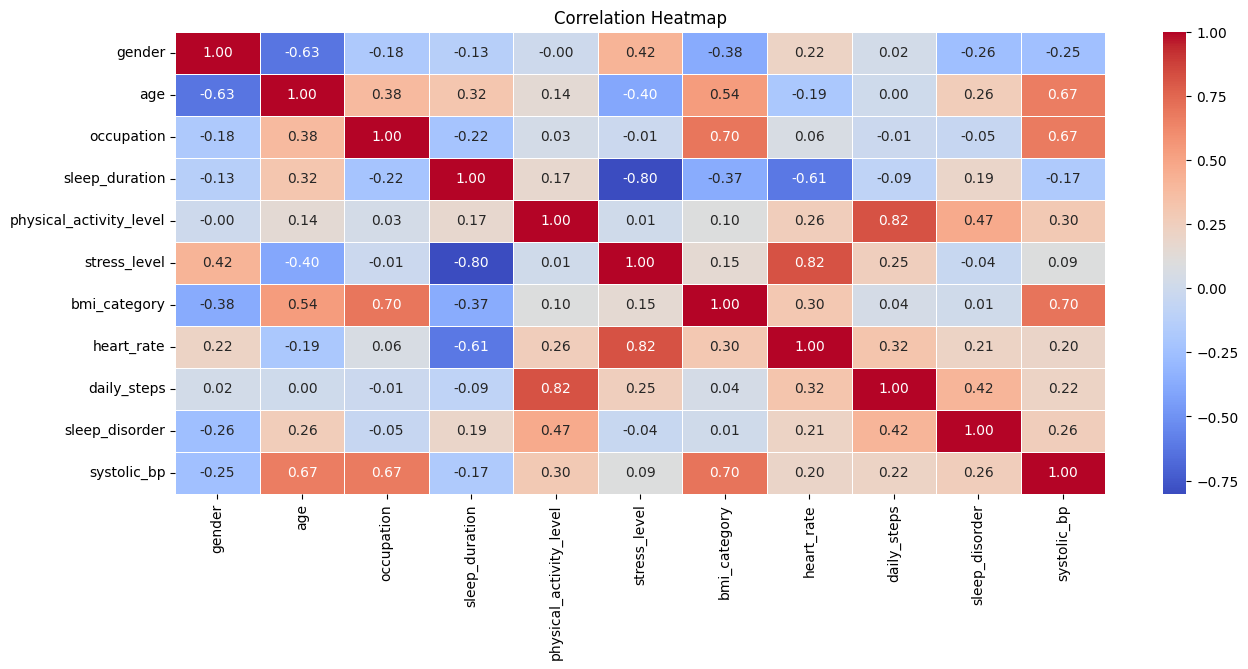

In [35]:
# Compute correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [36]:
!pip install lime

# __Data Splitting:__

In [37]:
selected_features = ['gender', 'age', 'occupation', 'sleep_duration', 'physical_activity_level',
                     'stress_level', 'bmi_category', 'daily_steps','heart_rate','systolic_bp']

X = data[selected_features]
y = data['sleep_disorder']
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


<!-- Model Building -->
<h2 id="model" style="color: #E74C3C; text-decoration: underline;"> Model Building</h2>



<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Decision Tree Model</span></b>
</h2>


In [38]:
# Feature Selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Selected Features: Index(['gender', 'age', 'occupation', 'sleep_duration',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'daily_steps', 'heart_rate', 'systolic_bp'],
      dtype='object')


In [40]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [41]:
# Model Evaluation
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.90      0.92      0.91        50
           2       0.96      0.88      0.92        52

    accuracy                           0.91       132
   macro avg       0.90      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132

Confusion Matrix:
 [[28  2  0]
 [ 2 46  2]
 [ 3  3 46]]


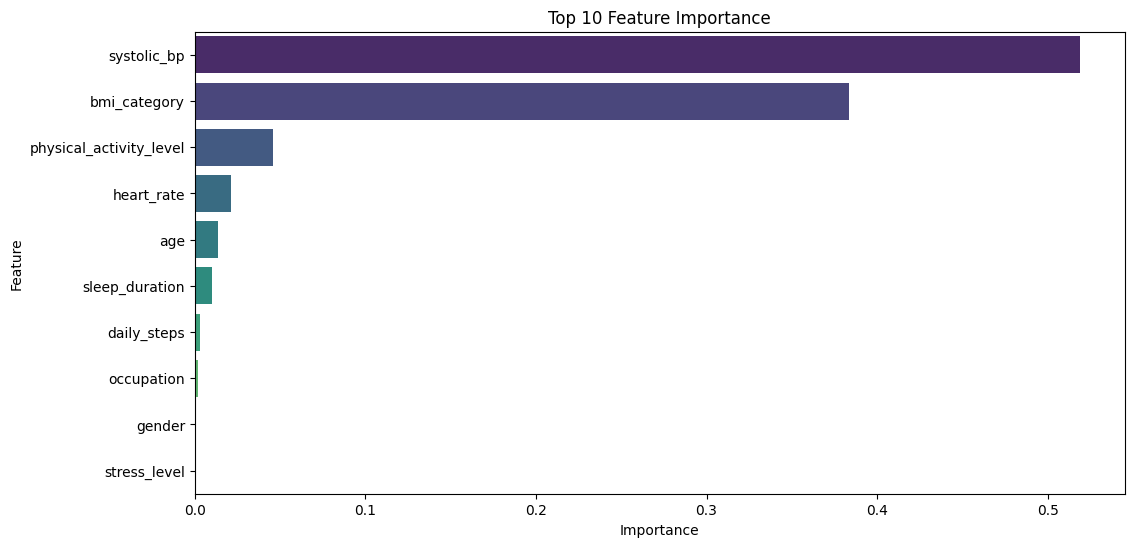

In [42]:
# Feature Importance Plot
importance = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importance')
plt.show()

<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Random Forest Model</span></b>
</h2>


In [43]:
# Feature Selection using ANOVA F-test for numerical input
selector = SelectKBest(score_func=f_classif, k=10)  # Use f_classif for numerical data
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features using ANOVA F-test:")
print(selected_features)

# Recursive Feature Elimination (RFE)
rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
selected_rfe_features = X.columns[rfe.support_]
print("Selected Features using RFE:")
print(selected_rfe_features)

# Final Features
final_features = list(set(selected_features).intersection(set(selected_rfe_features)))
print("Final Selected Features:")
print(final_features)
X_final = X[final_features]

# Splitting Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Apply SMOTE for Class Imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standard Scaling
scaler = StandardScaler()
X_train_smote = pd.DataFrame(scaler.fit_transform(X_train_smote), columns=X_train_smote.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



Selected Features using ANOVA F-test:
Index(['gender', 'age', 'occupation', 'sleep_duration',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'daily_steps', 'heart_rate', 'systolic_bp'],
      dtype='object')
Selected Features using RFE:
Index(['gender', 'age', 'occupation', 'sleep_duration',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'daily_steps', 'heart_rate', 'systolic_bp'],
      dtype='object')
Final Selected Features:
['occupation', 'systolic_bp', 'gender', 'age', 'heart_rate', 'sleep_duration', 'daily_steps', 'stress_level', 'physical_activity_level', 'bmi_category']


In [44]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.98      0.98      0.98        48
           2       0.92      0.92      0.92        13

    accuracy                           0.94        72
   macro avg       0.91      0.91      0.91        72
weighted avg       0.94      0.94      0.94        72

Confusion Matrix:
 [[ 9  1  1]
 [ 1 47  0]
 [ 1  0 12]]


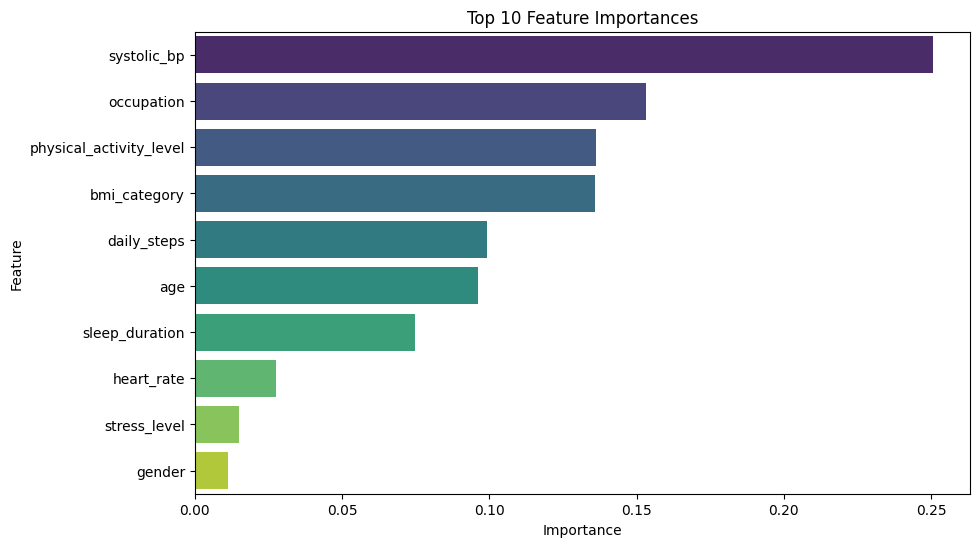

Random Forest Model with SMOTE, Feature Importance, Hyperparameter Tuning, and Standard Scaling Completed


In [45]:
# Model Evaluation
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Plot
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

print("Random Forest Model with SMOTE, Feature Importance, Hyperparameter Tuning, and Standard Scaling Completed")


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">KNN Model</span></b>
</h2>


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.92      0.96      0.94        48
           2       1.00      0.85      0.92        13

    accuracy                           0.92        72
   macro avg       0.91      0.87      0.89        72
weighted avg       0.92      0.92      0.92        72

Confusion Matrix:
 [[ 9  2  0]
 [ 2 46  0]
 [ 0  2 11]]


In [57]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform Grid Search for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [58]:

# Best parameters and score for KNN
print("Best Parameters (KNN):", grid_search_knn.best_params_)
print("Best Accuracy (KNN):", grid_search_knn.best_score_)

# Train the best KNN model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Classification Report for KNN
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy (KNN): 0.9056650246305418
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.96      0.96      0.96        48
           2       1.00      0.92      0.96        13

    accuracy                           0.93        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.93      0.93      0.93        72

Confusion Matrix (KNN):
 [[ 9  2  0]
 [ 2 46  0]
 [ 1  0 12]]


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Support Vector Machine</span></b>
</h2>


In [51]:
# Feature Selection
k_best = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
X_new = k_best.fit_transform(X, y)
selected_features = X.columns[k_best.get_support()]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# SVM with Hyperparameter Tuning
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [1, 10, 100, 1000],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

In [55]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 94.44%
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.98      0.98      0.98        48
           2       0.92      0.92      0.92        13

    accuracy                           0.94        72
   macro avg       0.91      0.91      0.91        72
weighted avg       0.94      0.94      0.94        72



ExactExplainer explainer: 73it [00:41,  1.34it/s]


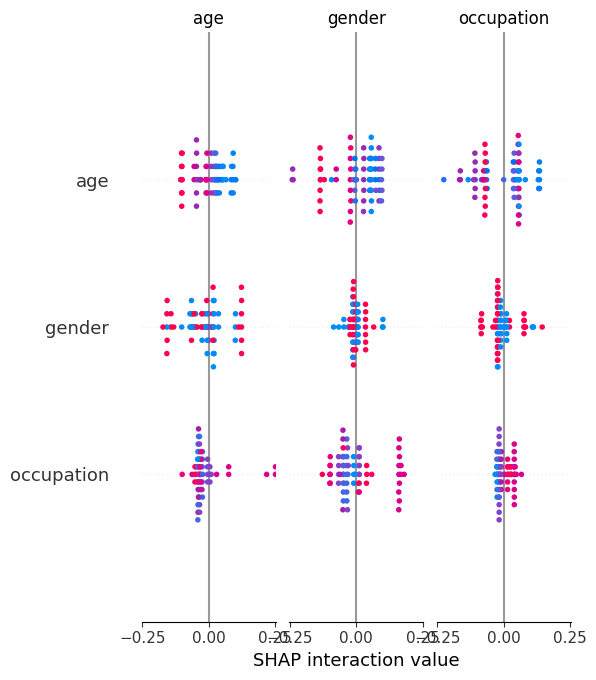

Selected Features: ['gender', 'age', 'occupation', 'sleep_duration', 'physical_activity_level', 'stress_level', 'bmi_category', 'daily_steps', 'heart_rate', 'systolic_bp']


In [56]:
# SHAP for Interpretability
explainer = shap.Explainer(best_svm_model.predict_proba, X_train) # Use best_model.predict_proba
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=selected_features)

# Display Selected Features
print("Selected Features:", list(selected_features))


<!-- Model Evaluation -->
<h2 id="evaluation" style="color: #3498DB; text-decoration: underline;">📊 Model Evaluation</h2>


<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Model Explanation: Why Random Forest or SVM?
</h3>
  <p style="color: #ecf0f1;"> <!-- Using a soothing purple shade -->
    Both Random Forest and SVM achieved the highest accuracy (94.44%), making them the best candidates for predicting sleep disorders.

Random Forest:

It is an ensemble learning method that reduces overfitting by aggregating multiple decision trees, improving stability and generalization.
It works well with both categorical and numerical data, making it suitable for diverse datasets.

The model maintains a high recall (sensitivity), meaning fewer false negatives, which is crucial in medical predictions to avoid missing potential sleep disorder cases.

SVM (Support Vector Machine):

It works well in high-dimensional spaces and finds the optimal hyperplane to separate classes, ensuring better generalization even on limited data.
SVM is less prone to overfitting than Decision Trees, making it a robust choice for classification tasks.

Additional Evaluation Metrics for Justification:

Apart from accuracy, other metrics help assess the model’s effectiveness:

Precision & Recall:

Random Forest & SVM have high recall (~98%), ensuring most cases are correctly identified.

High precision (~92-98%) reduces false positives, ensuring fewer misdiagnoses.

F1-Score:

Balances precision and recall, showing the model's reliability across different classes.

Confusion Matrix Analysis:

Shows minimal misclassification across all categories, reinforcing the model’s stability and reliability compared to Decision Tree and KNN.
Thus, Random Forest or SVM is the best model choice because it provides the highest accuracy while balancing precision, recall, and generalization, which are crucial in a medical prediction scenario.
  </p>
</div>

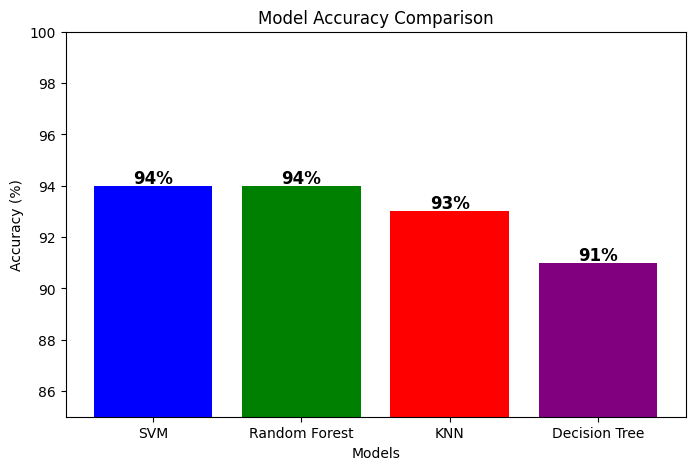

In [59]:
# Model names and their corresponding accuracies
models = ['SVM','Random Forest','KNN','Decision Tree']
accuracies = [94,94,93,91 ]  # Accuracy values from your results

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(85, 100)  # Setting y-axis limits for better visualization

# Show accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.10, f'{acc}%', ha='center', fontsize=12, fontweight='bold')

plt.show()
